In [ ]:
# library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, f1_score, accuracy_score, precision_score
from sklearn.model_selection import  cross_val_score, RandomizedSearchCV, cross_val_predict
from google.colab import drive
from scipy import stats
from imblearn.over_sampling import SMOTE

# Input the dataset

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path = '/content/drive/MyDrive/halim/Coding/course bootcamp/Home Credit Indonesia/dataset/application_train.csv'
train = pd.read_csv(train_path)

In [ ]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train.sample(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
247769,386686,0,Cash loans,M,N,Y,0,135000.0,983299.5,41791.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


# Data Exploration

## select categorical data

In [ ]:
train_cat = train.select_dtypes(include="object")
train_cat.head(5)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN


## select numerical data

In [ ]:
train_num = train.select_dtypes(include=["int", "float"])
train_num.head(5)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Get statistical summary

In [ ]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


# Data Cleaning

In [ ]:
train.duplicated().sum()

0

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [ ]:
train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

Terdapat nilai NA pada sebagian kolom dataset

In [ ]:
na_value = pd.DataFrame(train.isnull().sum(), columns=['NA value']).reset_index()
na_value['Percentage'] = (na_value['NA value'] / len(train)) * 100
na_value = na_value[na_value['Percentage'] > 40].sort_values(by='Percentage', ascending=False)

In [ ]:
na_value

,index,NA value,Percentage
48,COMMONAREA_AVG,214865,69.872297
76,COMMONAREA_MEDI,214865,69.872297
62,COMMONAREA_MODE,214865,69.872297
84,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
70,NONLIVINGAPARTMENTS_MODE,213514,69.432963
56,NONLIVINGAPARTMENTS_AVG,213514,69.432963
86,FONDKAPREMONT_MODE,210295,68.386172
82,LIVINGAPARTMENTS_MEDI,210199,68.354953
54,LIVINGAPARTMENTS_AVG,210199,68.354953
68,LIVINGAPARTMENTS_MODE,210199,68.354953


Semua kolom yang memiliki lebih dari 40 persen nilai yang hilang akan dihapus dari dataset.

In [ ]:
na_value_col = na_value['index'].unique()

In [ ]:
train = train.drop(columns=na_value_col)

## categorical missing value

In [ ]:
train_cat = train.select_dtypes(include=['object'])

In [ ]:
cat_col = train_cat.columns

In [ ]:
# Missing Value pada data object
train[cat_col] = train[cat_col].fillna(train[cat_col].mode().iloc[0])

## numerical missing value

In [ ]:
train_num = train.select_dtypes(include=["int", "float"])

In [ ]:
num_col = train_num.columns

In [ ]:
# Missing Value pada data object
train[num_col] = train[num_col].fillna(train[num_col].mean().iloc[0])

## distribution of numerical data

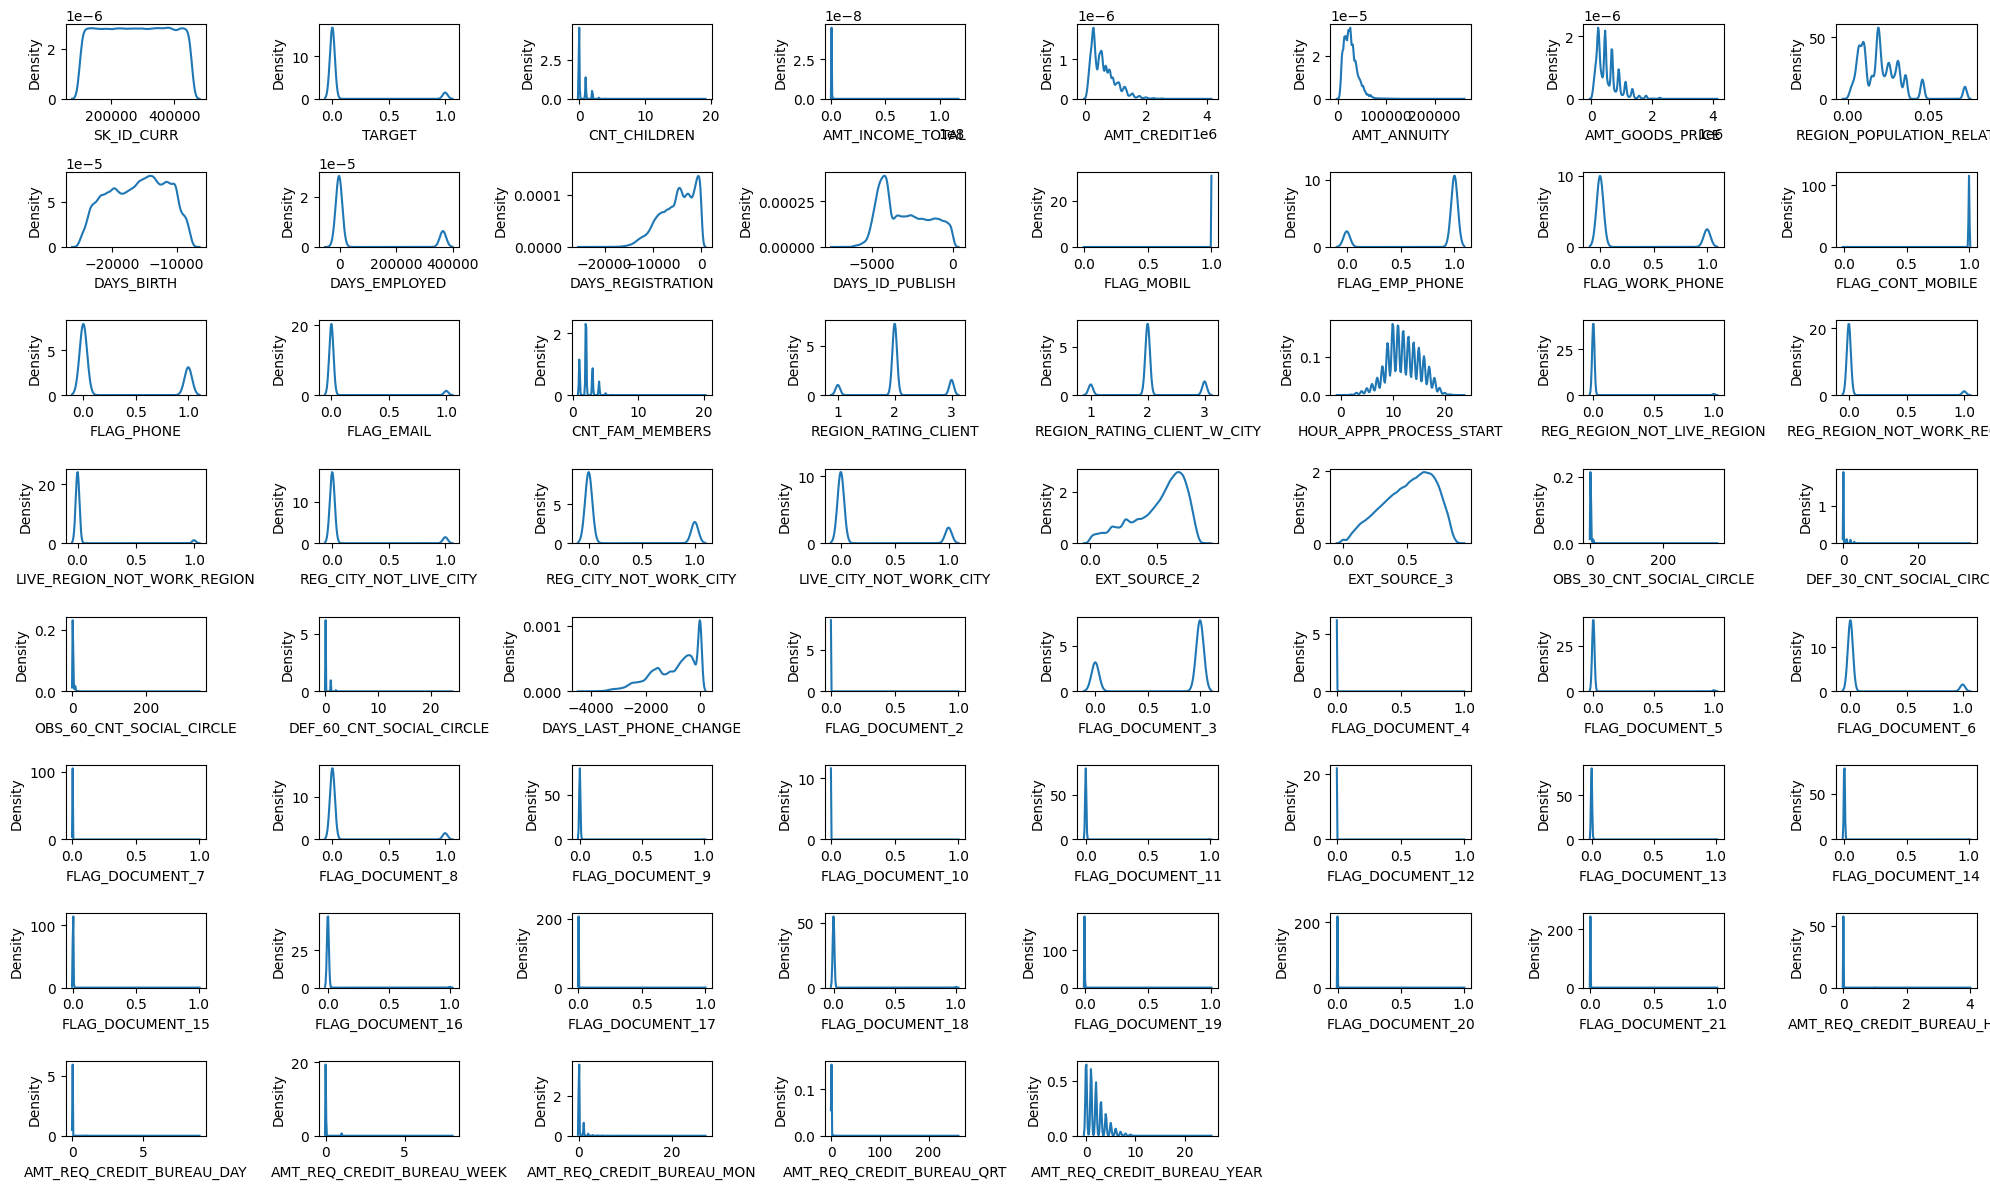

In [ ]:
plt.figure(figsize=(20, 12))

# Calculate the number of rows and columns needed for the subplots
num_rows = 8
num_cols = 8

for i, column in enumerate(train_num.columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.kdeplot(data=train_num, x=train_num[column])
    plt.tight_layout()

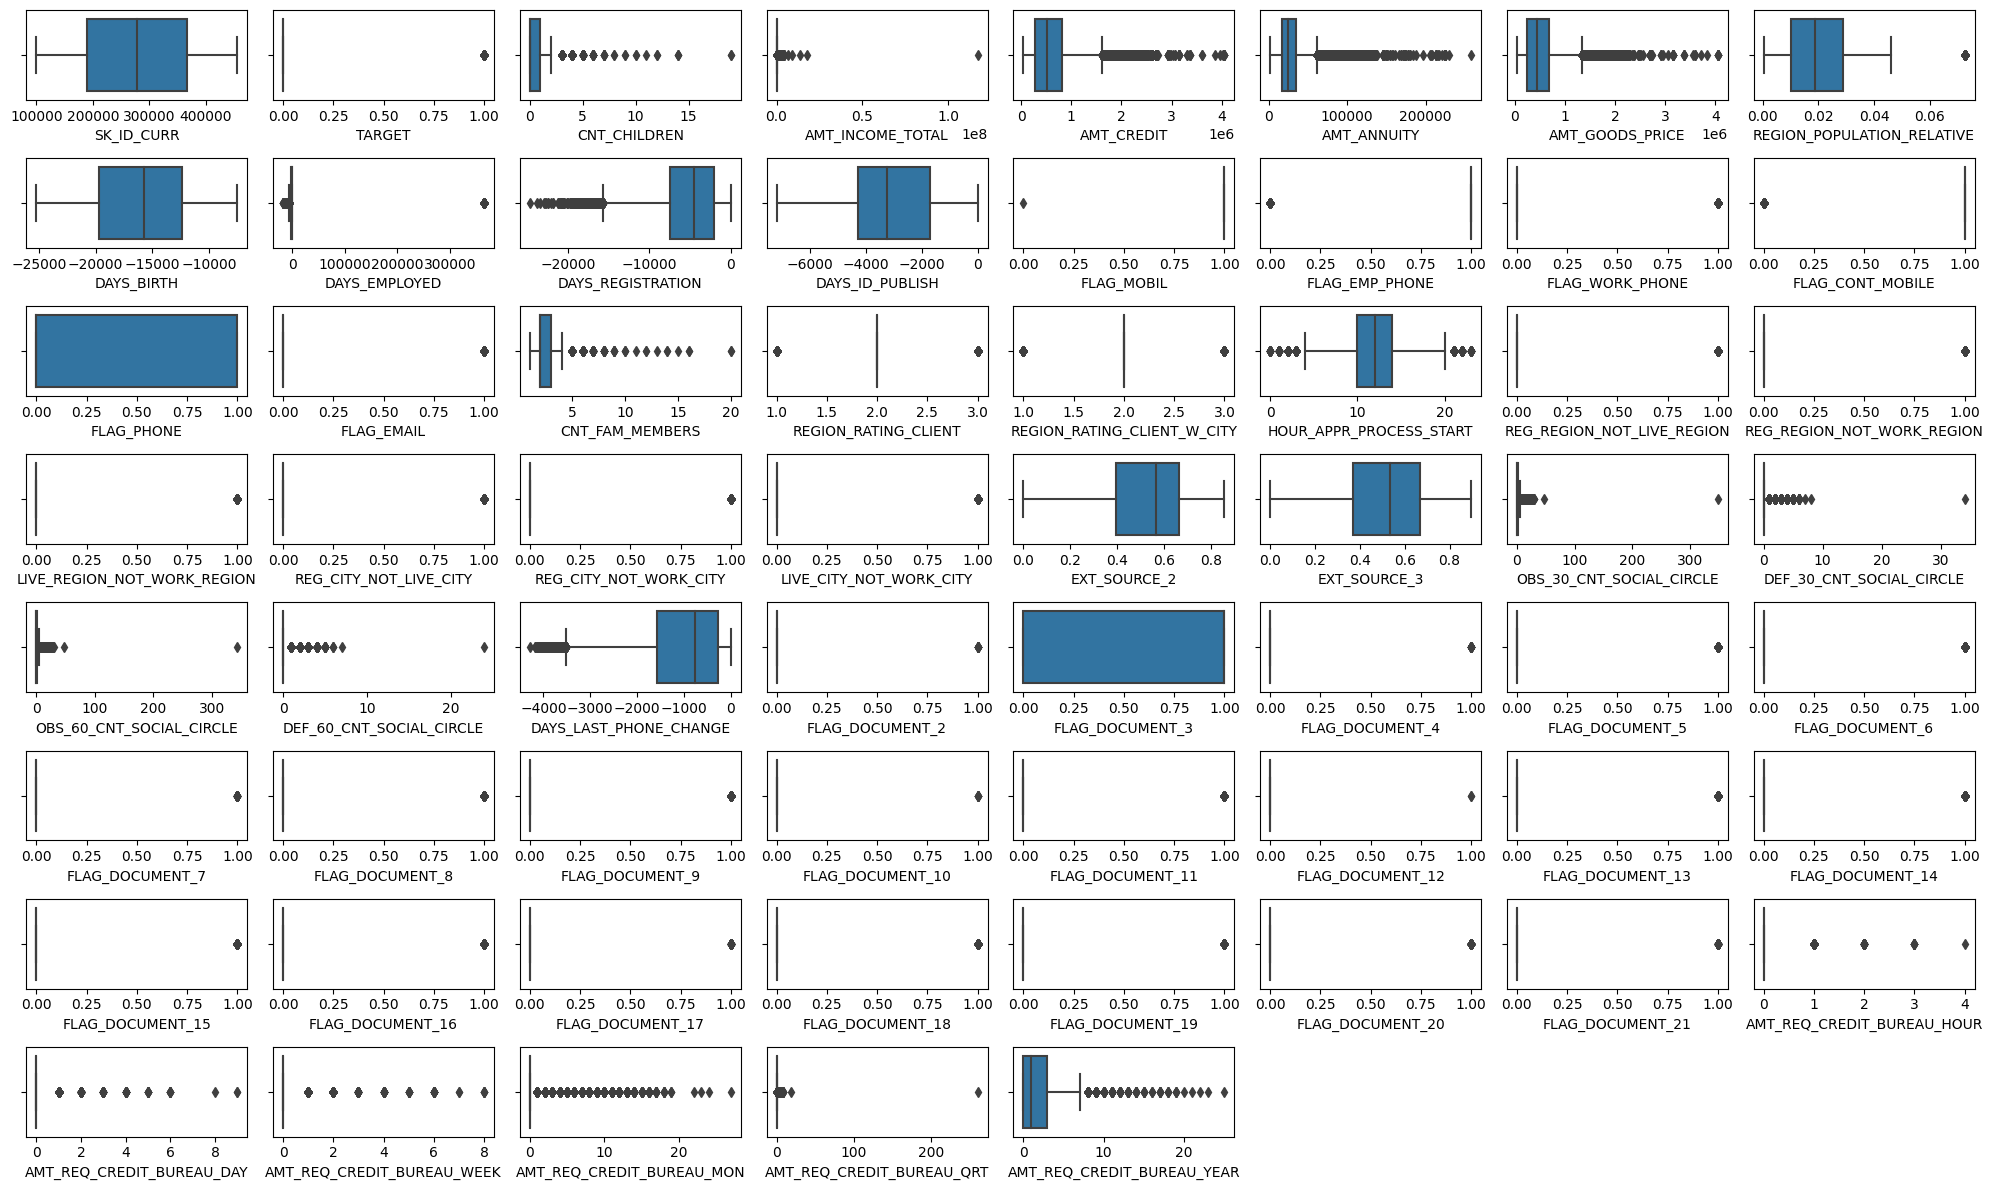

In [ ]:
plt.figure(figsize=(20, 12))

# Calculate the number of rows and columns needed for the subplots
num_rows = 8
num_cols = 8

for i, column in enumerate(train_num.columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data=train_num, x=train_num[column])
    plt.tight_layout()

## outlier

In [ ]:
print(f'Row before delete outlier at CNT_children :  {len(train)}')

filtered_entries = np.array([True] * len(train))

zscore = abs(stats.zscore(train['CNT_CHILDREN']))
filtered_entries = (zscore < 3) & filtered_entries

train = train[filtered_entries]

print(f'Row after delete outlier at CNT_children : {len(train)}')

Row before delete outlier at CNT_children :  307511
Row after delete outlier at CNT_children : 303239


## remove flag document

In [ ]:
columns_to_drop = train.filter(like='FLAG_DOCUMENT').columns
train.drop(columns=columns_to_drop, inplace=True)

# Exploratory Data Analytics

In [ ]:
train_cat.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion


## By Contract Type

In [ ]:
df_ct = train.groupby(["TARGET", "NAME_CONTRACT_TYPE"], as_index=False)["SK_ID_CURR"].nunique()
df_ct.head()

,TARGET,NAME_CONTRACT_TYPE,SK_ID_CURR
0,0,Cash loans,251579
1,0,Revolving loans,27264
2,1,Cash loans,22821
3,1,Revolving loans,1575


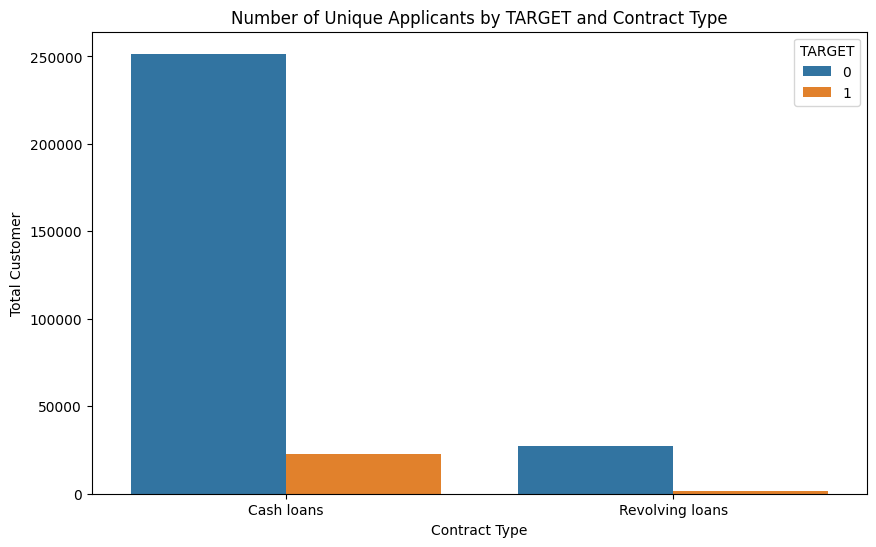

In [ ]:
# Visualisasi menggunakan Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='NAME_CONTRACT_TYPE', y='SK_ID_CURR', hue='TARGET', data=df_ct)
plt.title('Number of Unique Applicants by TARGET and Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Total Customer')
plt.show()

## By TYPE SUITE

In [ ]:
df_ts = train.groupby(["TARGET", "NAME_TYPE_SUITE"], as_index=False)["SK_ID_CURR"].nunique()
df_ts

,TARGET,NAME_TYPE_SUITE,SK_ID_CURR
0,0,Children,2982
1,0,Family,36605
2,0,Group of people,245
3,0,Other_A,782
4,0,Other_B,1575
5,0,"Spouse, partner",10266
6,0,Unaccompanied,226388
7,1,Children,233
8,1,Family,2956
9,1,Group of people,23


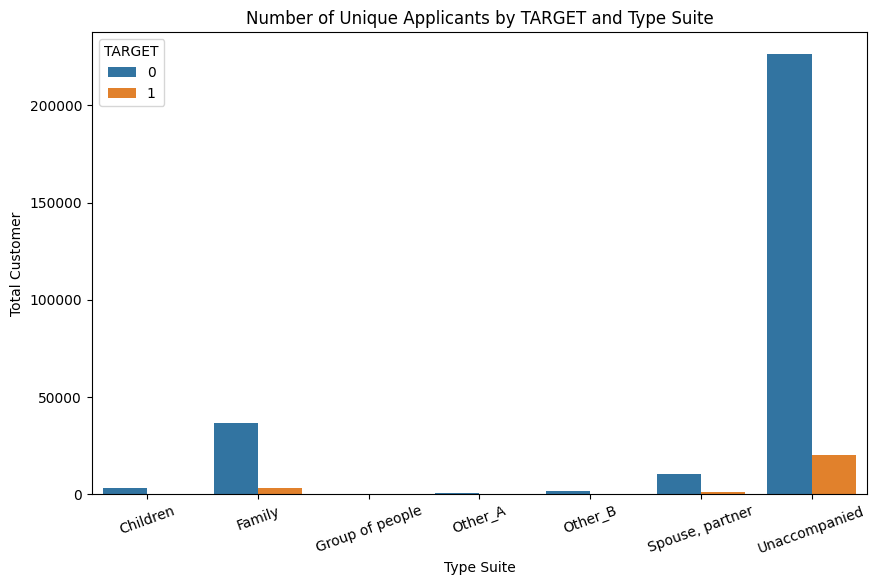

In [ ]:
# Visualisasi menggunakan Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='NAME_TYPE_SUITE', y='SK_ID_CURR', hue='TARGET', data=df_ts)
plt.title('Number of Unique Applicants by TARGET and Type Suite')
plt.xlabel('Type Suite')
plt.ylabel('Total Customer')

plt.xticks(rotation=20)

plt.show()

## By Income Type

In [ ]:
df_it = train.groupby(["TARGET", "NAME_INCOME_TYPE"], as_index=False)["SK_ID_CURR"].nunique()
df_it

,TARGET,NAME_INCOME_TYPE,SK_ID_CURR
0,0,Businessman,10
1,0,Commercial associate,65451
2,0,Maternity leave,3
3,0,Pensioner,52279
4,0,State servant,20058
5,0,Student,18
6,0,Unemployed,14
7,0,Working,141010
8,1,Commercial associate,5284
9,1,Maternity leave,2


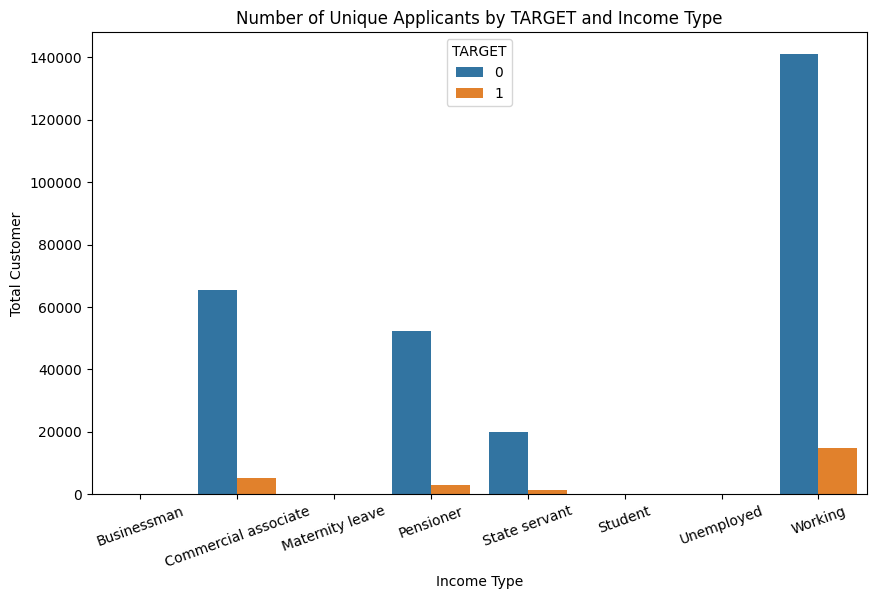

In [ ]:
# Visualisasi menggunakan Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='NAME_INCOME_TYPE', y='SK_ID_CURR', hue='TARGET', data=df_it)
plt.title('Number of Unique Applicants by TARGET and Income Type')
plt.xlabel('Income Type')
plt.ylabel('Total Customer')

plt.xticks(rotation=20)

plt.show()

## By Occupation Type

In [ ]:
df_ot = train.groupby(["TARGET", "OCCUPATION_TYPE"], as_index=False)["SK_ID_CURR"].nunique()
df_ot

,TARGET,OCCUPATION_TYPE,SK_ID_CURR
0,0,Accountants,9223
1,0,Cleaning staff,4134
2,0,Cooking staff,5243
3,0,Core staff,25320
4,0,Drivers,16233
5,0,HR staff,523
6,0,High skill tech staff,10563
7,0,IT staff,489
8,0,Laborers,137850
9,0,Low-skill Laborers,1695


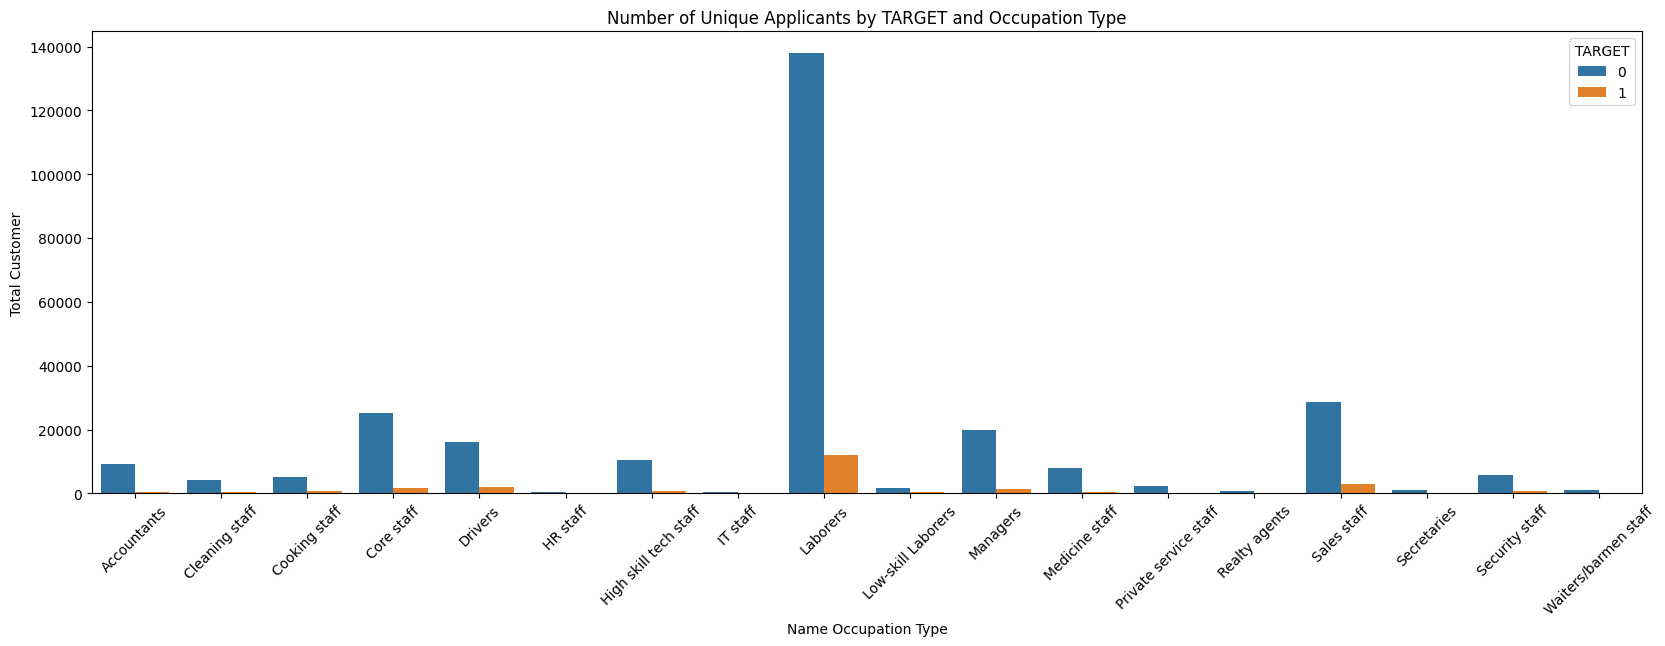

In [ ]:
# Visualisasi menggunakan Bar Plot
plt.figure(figsize=(20, 6))
sns.barplot(x='OCCUPATION_TYPE', y='SK_ID_CURR', hue='TARGET', data=df_ot)
plt.title('Number of Unique Applicants by TARGET and Occupation Type')
plt.xlabel('Name Occupation Type')
plt.ylabel('Total Customer')

plt.xticks(rotation=45)

plt.show()

# Feature Engineering

### Encoding

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols = cat_col

for col in cols:
  train[col] = le.fit_transform(train[col])
  print(le.classes_)

train.head()

['Cash loans' 'Revolving loans']
['F' 'M' 'XNA']
['N' 'Y']
['N' 'Y']
['Children' 'Family' 'Group of people' 'Other_A' 'Other_B'
 'Spouse, partner' 'Unaccompanied']
['Businessman' 'Commercial associate' 'Maternity leave' 'Pensioner'
 'State servant' 'Student' 'Unemployed' 'Working']
['Academic degree' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Secondary / secondary special']
['Civil marriage' 'Married' 'Separated' 'Single / not married' 'Unknown'
 'Widow']
['Co-op apartment' 'House / apartment' 'Municipal apartment'
 'Office apartment' 'Rented apartment' 'With parents']
['Accountants' 'Cleaning staff' 'Cooking staff' 'Core staff' 'Drivers'
 'HR staff' 'High skill tech staff' 'IT staff' 'Laborers'
 'Low-skill Laborers' 'Managers' 'Medicine staff' 'Private service staff'
 'Realty agents' 'Sales staff' 'Secretaries' 'Security staff'
 'Waiters/barmen staff']
['FRIDAY' 'MONDAY' 'SATURDAY' 'SUNDAY' 'THURSDAY' 'TUESDAY' 'WEDNESDAY']
['Advertising' 'Agriculture' 'Bank' 'Business

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,278180.518577,278180.518577,278180.518577,278180.518577,278180.518577,278180.518577
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Splitting the Data

In [ ]:
train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [ ]:
X = train.drop(columns=['SK_ID_CURR', 'TARGET'])

y = train['TARGET']

X.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,...,2.0,2.0,2.0,-1134.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,...,0.0,1.0,0.0,-828.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,...,0.0,0.0,0.0,-815.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,...,0.0,2.0,0.0,-617.0,278180.518577,278180.518577,278180.518577,278180.518577,278180.518577,278180.518577
4,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,...,0.0,0.0,0.0,-1106.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
sm = SMOTE(random_state = 2)
x_over, y_over = sm.fit_resample(X, y.ravel())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.3, random_state=42)
# Checking if the data is splitted properly
print('X_train', X_train.shape)  #Printing the X_train Features Shape
print('y_train', y_train.shape)  #Printing the y_train Labels Shape
print('X_test', X_test.shape)    #Printing the X_test Features Shape
print('y_test', y_test.shape)    #Printing the y_test Labels  Shape

X_train (390380, 51)
y_train (390380,)
X_test (167306, 51)
y_test (167306,)


# Building the model

## CatBoost

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.2 MB/s eta 0:00:00


In [ ]:
import catboost

In [ ]:
from catboost import CatBoostClassifier

cbst = CatBoostClassifier()

cbst.fit(X_train, y_train)

Learning rate set to 0.131674
0:	learn: 0.6045534	total: 199ms	remaining: 3m 18s
1:	learn: 0.5350353	total: 332ms	remaining: 2m 45s
2:	learn: 0.4684824	total: 462ms	remaining: 2m 33s
3:	learn: 0.4482259	total: 586ms	remaining: 2m 25s
4:	learn: 0.4156548	total: 715ms	remaining: 2m 22s
5:	learn: 0.3970909	total: 840ms	remaining: 2m 19s
6:	learn: 0.3504928	total: 966ms	remaining: 2m 17s
7:	learn: 0.3238581	total: 1.08s	remaining: 2m 13s
8:	learn: 0.3073776	total: 1.22s	remaining: 2m 14s
9:	learn: 0.2979726	total: 1.34s	remaining: 2m 12s
10:	learn: 0.2895904	total: 1.46s	remaining: 2m 11s
11:	learn: 0.2759408	total: 1.58s	remaining: 2m 10s
12:	learn: 0.2630749	total: 1.72s	remaining: 2m 10s
13:	learn: 0.2554796	total: 1.97s	remaining: 2m 18s
14:	learn: 0.2511690	total: 2.14s	remaining: 2m 20s
15:	learn: 0.2467639	total: 2.29s	remaining: 2m 20s
16:	learn: 0.2419085	total: 2.4s	remaining: 2m 19s
17:	learn: 0.2378004	total: 2.56s	remaining: 2m 19s
18:	learn: 0.2353015	total: 2.78s	remaining: 

In [ ]:
## Performance
pred = cbst.predict(X_test)                #Predicting the X_test

#Testing the model accuracy with different paramtes
acc  = accuracy_score(y_test, pred)   # Getting the Accuracy Score
f1   = f1_score(y_test, pred)         # Getting the f1 Score
rec  = recall_score(y_test, pred)     # Getting the recall Score
prec = precision_score(y_test, pred)  # Getting the Precision Score
cm   = confusion_matrix(y_test, pred) # Getting the confusion Matrix

#Defining a DataFrame
results = pd.DataFrame([['CatBoost', acc, f1, rec, prec]],
                      columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])

#Printing the Model Results X = pd.get_dummies(data=X)with different Metrics
results

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,CatBoost,0.953737,0.951869,0.912066,0.995305


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Building the model
clf_rf = RandomForestClassifier(random_state=0)#Creating the Random Forest Classifier Model
clf_rf.fit(X_train, y_train)                   #Training the Model with X_train & y_train


RandomForestClassifier(random_state=0)

In [ ]:
## Performance
pred = clf_rf.predict(X_test)                  #Predicting the X_test

#Testing the model accuracy with different paramtes
acc  = accuracy_score(y_test, pred)   # Getting the Accuracy Score
f1   = f1_score(y_test, pred)         # Getting the f1 Score
rec  = recall_score(y_test, pred)     # Getting the recall Score
prec = precision_score(y_test, pred)  # Getting the Precision Score
cm   = confusion_matrix(y_test, pred) # Getting the confusion Matrix

#Defining a DataFrame
rf_results = pd.DataFrame([['Random Forest Classifier', acc, f1, rec, prec]],
                      columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])
results = results.append(rf_results, ignore_index=True)


#Printing the Model Results with different Metrics
results

<ipython-input-39-eec0519b9aca>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(rf_results, ignore_index=True)


,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,CatBoost,0.953737,0.951869,0.912066,0.995305
1,Random Forest Classifier,0.947563,0.945334,0.903950,0.990688


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Model Building
clf_lr = LogisticRegression(random_state=0) #Creating the Logistic Regression Model
clf_lr.fit(X_train, y_train)                #Training the Model with X_train & y_train


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
## Performance
pred = clf_lr.predict(X_test)                  #Predicting the X_test

#Testing the model accuracy with different paramtes
acc  = accuracy_score(y_test, pred)   # Getting the Accuracy Score
f1   = f1_score(y_test, pred)         # Getting the f1 Score
rec  = recall_score(y_test, pred)     # Getting the recall Score
prec = precision_score(y_test, pred)  # Getting the Precision Score
cm   = confusion_matrix(y_test, pred) # Getting the confusion Matrix

#Defining a DataFrame
rf_results = pd.DataFrame([['Logistic Regression', acc, f1, rec, prec]],
                      columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])
results = results.append(rf_results, ignore_index=True)


#Printing the Model Results with different Metrics
results

<ipython-input-41-f3f19113d684>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(rf_results, ignore_index=True)


,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,CatBoost,0.953737,0.951869,0.912066,0.995305
1,Random Forest Classifier,0.947563,0.945334,0.903950,0.990688
2,Logistic Regression,0.577965,0.550167,0.514556,0.591072


## XGBoost

In [ ]:
from xgboost import XGBClassifier

#Building the model
clf_gx = XGBClassifier()      #Creating the GXboost Model
clf_gx.fit(X_train, y_train)  #Training the Model with X_train & y_train


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
## Performance
pred = clf_gx.predict(X_test) #Predicting the X_test

#Testing the model accuracy with different paramtes
acc  = accuracy_score(y_test, pred)   # Getting the Accuracy Score
f1   = f1_score(y_test, pred)         # Getting the f1 Score
rec  = recall_score(y_test, pred)     # Getting the recall Score
prec = precision_score(y_test, pred)  # Getting the Precision Score
cm   = confusion_matrix(y_test, pred) # Getting the confusion Matrix

#Defining a DataFrame
rf_results = pd.DataFrame([['XGBoost', acc, f1, rec, prec]],
                      columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])
results = results.append(rf_results, ignore_index=True)


#Printing the Model Results with different Metrics
results

<ipython-input-43-522a3a742a54>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(rf_results, ignore_index=True)


,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,CatBoost,0.953737,0.951869,0.912066,0.995305
1,Random Forest Classifier,0.947563,0.945334,0.903950,0.990688
2,Logistic Regression,0.577965,0.550167,0.514556,0.591072
3,XGBoost,0.950970,0.948958,0.908705,0.992942


# Prediction

# Input the dataset

In [ ]:
test_path = '/content/drive/MyDrive/halim/Coding/course bootcamp/Home Credit Indonesia/dataset/application_test.csv'
test = pd.read_csv(test_path)

In [ ]:
test_path_id = '/content/drive/MyDrive/halim/Coding/course bootcamp/Home Credit Indonesia/dataset/application_test.csv'
test_id = pd.read_csv(test_path)

In [ ]:
test_id = test_id['SK_ID_CURR']

In [ ]:
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [ ]:
test.duplicated().sum()

0

In [ ]:
na_value_test = pd.DataFrame(test.isnull().sum(), columns=['NA value']).reset_index()
na_value_test['Percentage'] = (na_value_test['NA value'] / len(test)) * 100
na_value_test = na_value_test[na_value_test['Percentage'] > 40].sort_values(by='Percentage', ascending=False)

In [ ]:
na_value_test

,index,NA value,Percentage
47,COMMONAREA_AVG,33495,68.716150
75,COMMONAREA_MEDI,33495,68.716150
61,COMMONAREA_MODE,33495,68.716150
55,NONLIVINGAPARTMENTS_AVG,33347,68.412523
83,NONLIVINGAPARTMENTS_MEDI,33347,68.412523
69,NONLIVINGAPARTMENTS_MODE,33347,68.412523
85,FONDKAPREMONT_MODE,32797,67.284179
81,LIVINGAPARTMENTS_MEDI,32780,67.249302
67,LIVINGAPARTMENTS_MODE,32780,67.249302
53,LIVINGAPARTMENTS_AVG,32780,67.249302


In [ ]:
na_value_test_col = na_value_test['index'].unique()

In [ ]:
test = test.drop(columns=na_value_test_col)

## categorical missing value

In [ ]:
test_cat = test.select_dtypes(include=['object'])

In [ ]:
cat_col_test = test_cat.columns

In [ ]:
# Missing Value pada data object
test[cat_col_test] = test[cat_col_test].fillna(test[cat_col_test].mode().iloc[0])

## numerical missing value

In [ ]:
test_num = test.select_dtypes(include=["int", "float"])

In [ ]:
num_col_test = test_num.columns

In [ ]:
# Missing Value pada data object
test[num_col_test] = test[num_col_test].fillna(test[num_col_test].mean().iloc[0])

## remove flag document

In [ ]:
columns_to_drop_test = test.filter(like='FLAG_DOCUMENT').columns
test.drop(columns=columns_to_drop_test, inplace=True)

# Feature Engineering

### Encoding

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols = cat_col_test

for col in cols:
  test[col] = le.fit_transform(test[col])
  print(le.classes_)

test.head()

['Cash loans' 'Revolving loans']
['F' 'M']
['N' 'Y']
['N' 'Y']
['Children' 'Family' 'Group of people' 'Other_A' 'Other_B'
 'Spouse, partner' 'Unaccompanied']
['Businessman' 'Commercial associate' 'Pensioner' 'State servant'
 'Student' 'Unemployed' 'Working']
['Academic degree' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Secondary / secondary special']
['Civil marriage' 'Married' 'Separated' 'Single / not married' 'Widow']
['Co-op apartment' 'House / apartment' 'Municipal apartment'
 'Office apartment' 'Rented apartment' 'With parents']
['Accountants' 'Cleaning staff' 'Cooking staff' 'Core staff' 'Drivers'
 'HR staff' 'High skill tech staff' 'IT staff' 'Laborers'
 'Low-skill Laborers' 'Managers' 'Medicine staff' 'Private service staff'
 'Realty agents' 'Sales staff' 'Secretaries' 'Security staff'
 'Waiters/barmen staff']
['FRIDAY' 'MONDAY' 'SATURDAY' 'SUNDAY' 'THURSDAY' 'TUESDAY' 'WEDNESDAY']
['Advertising' 'Agriculture' 'Bank' 'Business Entity Type 1'
 'Business Entity T

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,0.0,0.0,0.0,-1740.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,3.00000
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,0.0,0.0,0.0,-856.0,0.00000,0.00000,0.00000,0.00000,1.00000,4.00000
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,0.0,0.0,0.0,-1805.0,0.00000,0.00000,0.00000,0.00000,0.00000,3.00000
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,0.0,0.0,0.0,-821.0,277796.67635,277796.67635,277796.67635,277796.67635,277796.67635,277796.67635


In [ ]:
test = test.drop(columns=['SK_ID_CURR'])

# Predict

In [ ]:
# XGBoost
#submission_preds = clf_gx.predict(df_test)

In [ ]:
# automl
#submission_preds = automl.predict(df_test)

In [ ]:
# Random Forest
#submission_preds = clf_rf.predict(df_test)

In [ ]:
# Logistic Regression
# submission_preds = clf_lr.predict(df_test)

In [ ]:
# Catboost
submission_preds = cbst.predict(test)

In [ ]:
df = pd.DataFrame({"SK_ID_CURR":test_id.values,
                   "TARGET":submission_preds,
                   })

In [ ]:
df.head()

,SK_ID_CURR,TARGET
0,100001,0
1,100005,1
2,100013,0
3,100028,0
4,100038,1


In [ ]:
df.to_csv("submission.csv", index=False)